In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [23]:
d=pd.read_csv(r'C:\Users\user\Desktop\DataScience\Week-7-MachineLearning\Week-7-MachineLearning\weather\minute_weather.csv')
d.shape

(1587257, 13)

In [24]:
sample_d=d[(d['rowID']%10)==0]
sample_d.shape

(158726, 13)

In [25]:
sample_d.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [26]:
sample_d[sample_d['rain_accumulation']==0].shape

(157812, 13)

In [27]:
sample_d[sample_d['rain_duration']==0].shape

(157237, 13)

In [28]:
del sample_d['rain_accumulation']
del sample_d['rain_duration']

In [29]:
sample_d.shape

(158726, 11)

In [30]:
rows_before=sample_d.shape[0]
sample_d=sample_d.dropna()
rows_after=sample_d.shape[0]

In [31]:
rows_before-rows_after

46

In [32]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [33]:
select_d=sample_d[features]

In [34]:
select_d.head()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4


In [35]:
x=StandardScaler().fit_transform(select_d)
x

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

In [36]:
kmeans=KMeans(n_clusters=12)
model=kmeans.fit(x)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [38]:
centers=model.cluster_centers_
centers

array([[-0.16370459,  0.8634041 , -1.31126777, -0.58955336, -1.16710698,
        -0.60484116, -0.64125855],
       [-1.18250566, -0.8704315 ,  0.44682454,  1.98343276,  0.53830644,
         1.94439266,  0.90870335],
       [ 0.24463782, -0.99629195,  0.65788483, -0.54688279,  0.84765236,
        -0.52962224,  1.1612823 ],
       [ 0.13261014,  0.84096019,  1.41240254, -0.63819053,  1.67654737,
        -0.58899484, -0.71369989],
       [-0.21055439,  0.6330789 ,  0.40856917,  0.73359542,  0.51674121,
         0.67175466, -0.15171463],
       [ 1.36768818, -0.08151489, -1.20649644, -0.0510817 , -1.07519624,
        -0.03084637, -0.97766689],
       [-0.7065958 ,  0.53374882,  0.17516434, -0.58436054,  0.34479277,
        -0.59780203, -0.10742667],
       [ 0.71641154,  0.44913707,  0.28554319, -0.53643487,  0.47281305,
        -0.54268212, -0.76657478],
       [ 0.06113923, -0.78891905, -1.19730343, -0.5707786 , -1.0433185 ,
        -0.58536331,  0.87915471],
       [ 1.19007801, -0.2546

In [39]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [40]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [41]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,-0.163705,0.863404,-1.311268,-0.589553,-1.167107,-0.604841,-0.641259,0
1,-1.182506,-0.870431,0.446825,1.983433,0.538306,1.944393,0.908703,1
2,0.244638,-0.996292,0.657885,-0.546883,0.847652,-0.529622,1.161282,2
3,0.132610,0.840960,1.412403,-0.638191,1.676547,-0.588995,-0.713700,3
4,-0.210554,0.633079,0.408569,0.733595,0.516741,0.671755,-0.151715,4
5,1.367688,-0.081515,-1.206496,-0.051082,-1.075196,-0.030846,-0.977667,5
6,-0.706596,0.533749,0.175164,-0.584361,0.344793,-0.597802,-0.107427,6
7,0.716412,0.449137,0.285543,-0.536435,0.472813,-0.542682,-0.766575,7
8,0.061139,-0.788919,-1.197303,-0.570779,-1.043318,-0.585363,0.879155,8
9,1.190078,-0.254683,-1.154932,2.122613,-1.053408,2.239363,-1.134569,9


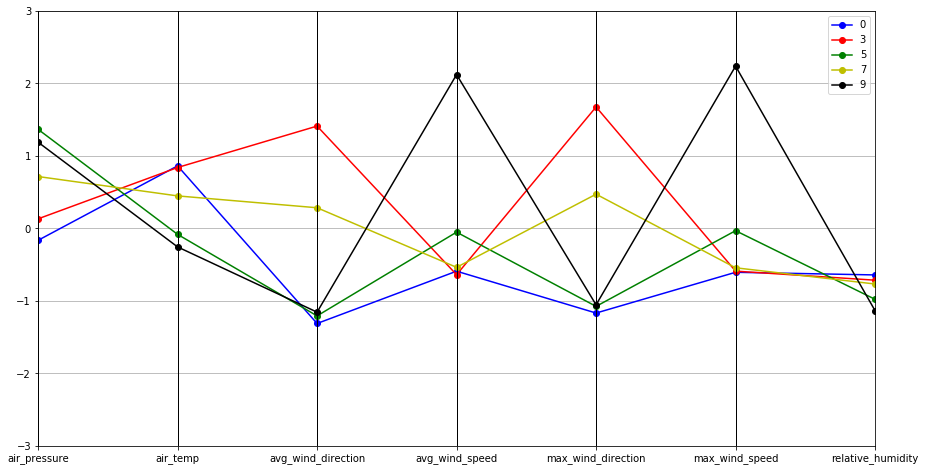

In [42]:
parallel_plot(P[P['relative_humidity'] < -0.5])

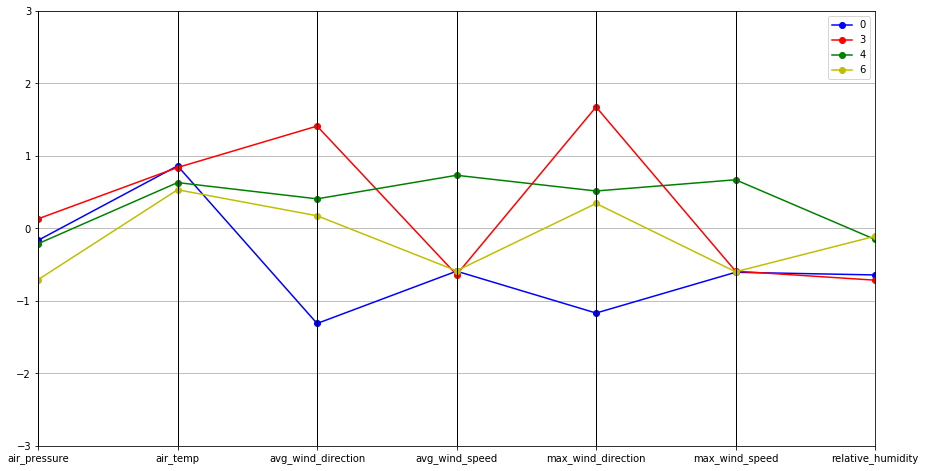

In [44]:
parallel_plot(P[P['air_temp'] > 0.5])

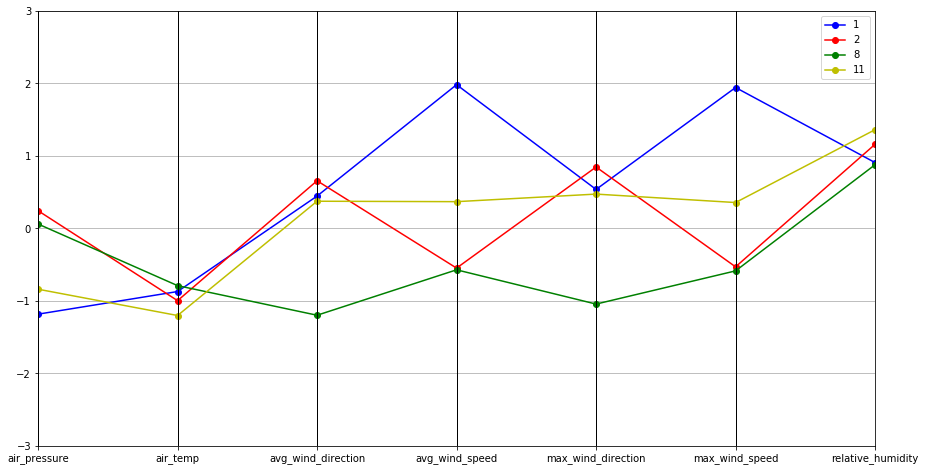

In [45]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])